# Columns Describtion:
* ***Booking_ID***: Unique identifier for each booking
* ***number of adults***: Number of adults included in the booking
* ***number of children***: Number of children included in the booking
* ***number of weekend nights***: Number of weekend nights included in the booking
* ***number of week nights***:Number of week nights included in the booking
* ***type of meal***: type of meal included in the booking
* ***car parking space***: Indicates whether a car parking space was requested or included in the booking
* ***room type***: Type of room booked
* ***lead time***: Number of days between the booking date and the arrival date
* ***market segment type***: Type of market segment associated with the booking
* ***repeated***: Indicates whether the booking is a repeat booking
* ***P-C***: Number of previous bookings that were canceled by the customer prior to the current booking
* ***P-not-C***: Number of previous bookings not canceled by the customer prior to the current booking
* ***average price***: Average price associated with the booking
* ***special requests***: Number of special requests made by the guest
* ***date of reservation***: Date of the reservation
* ***booking status***: Status of the booking ( canceled or not canceled)

# Importing The Toolkits

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



import warnings
warnings.filterwarnings('ignore')

# Reading Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving first inten project.csv to first inten project.csv


In [ ]:
df = pd.read_csv(r'first inten project.csv')

In [ ]:
df.shape

(36285, 17)

In [ ]:
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

* There is no null values.
* The date of reservation type should be changed to datetime

In [ ]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


* There are some reservations that have not adults so, i think this is so wierd. So, Lets discover them.

In [ ]:
df.duplicated().sum()

0

In [ ]:
filt = (df['number of adults'] == 0)
df_no_adults=df.loc[filt]
df_no_adults.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
32,INN00033,0,2,0,3,Meal Plan 1,0,Room_Type 2,56,Online,0,0,0,82.44,1,12/7/2018,Not_Canceled
287,INN00288,0,2,2,2,Meal Plan 1,0,Room_Type 1,68,Online,0,0,0,108.38,1,4/24/2018,Canceled
653,INN00654,0,2,1,2,Meal Plan 1,0,Room_Type 2,78,Online,0,0,0,115.68,1,8/19/2018,Not_Canceled
937,INN00938,0,2,0,3,Meal Plan 1,0,Room_Type 2,40,Online,0,0,0,6.67,1,1/14/2018,Not_Canceled
954,INN00955,0,2,1,1,Meal Plan 1,0,Room_Type 2,92,Online,0,0,0,81.50,2,10/29/2018,Not_Canceled


In [ ]:
df.describe(include=object).T

,count,unique,top,freq
Booking_ID,36285,36285,INN00001,1
type of meal,36285,4,Meal Plan 1,27842
room type,36285,7,Room_Type 1,28138
market segment type,36285,5,Online,23221
date of reservation,36285,553,10/13/2018,254
booking status,36285,2,Not_Canceled,24396


In [ ]:
# Converting date of reservation to datetime to help us in the analysis stage
df['date of reservation'] = pd.to_datetime(df['date of reservation'],infer_datetime_format=True, errors='coerce')
df['date of reservation'] .head()

,date of reservation
0,2015-10-02
1,2018-11-06
2,2018-02-28
3,2017-05-20
4,2018-04-11


In [ ]:
df.isna().sum()

,0
Booking_ID,0
number of adults,0
number of children,0
number of weekend nights,0
number of week nights,0
type of meal,0
car parking space,0
room type,0
lead time,0
market segment type,0


In [ ]:
df.dropna(inplace=True)

# EDA

In [ ]:
sns.set_theme(style="whitegrid")
colors=['#295F98', '#CDC2A5']

palette={'B': colors[0], 'M': colors[1]}

In [ ]:
num_cols  = df.select_dtypes(include=np.number).columns

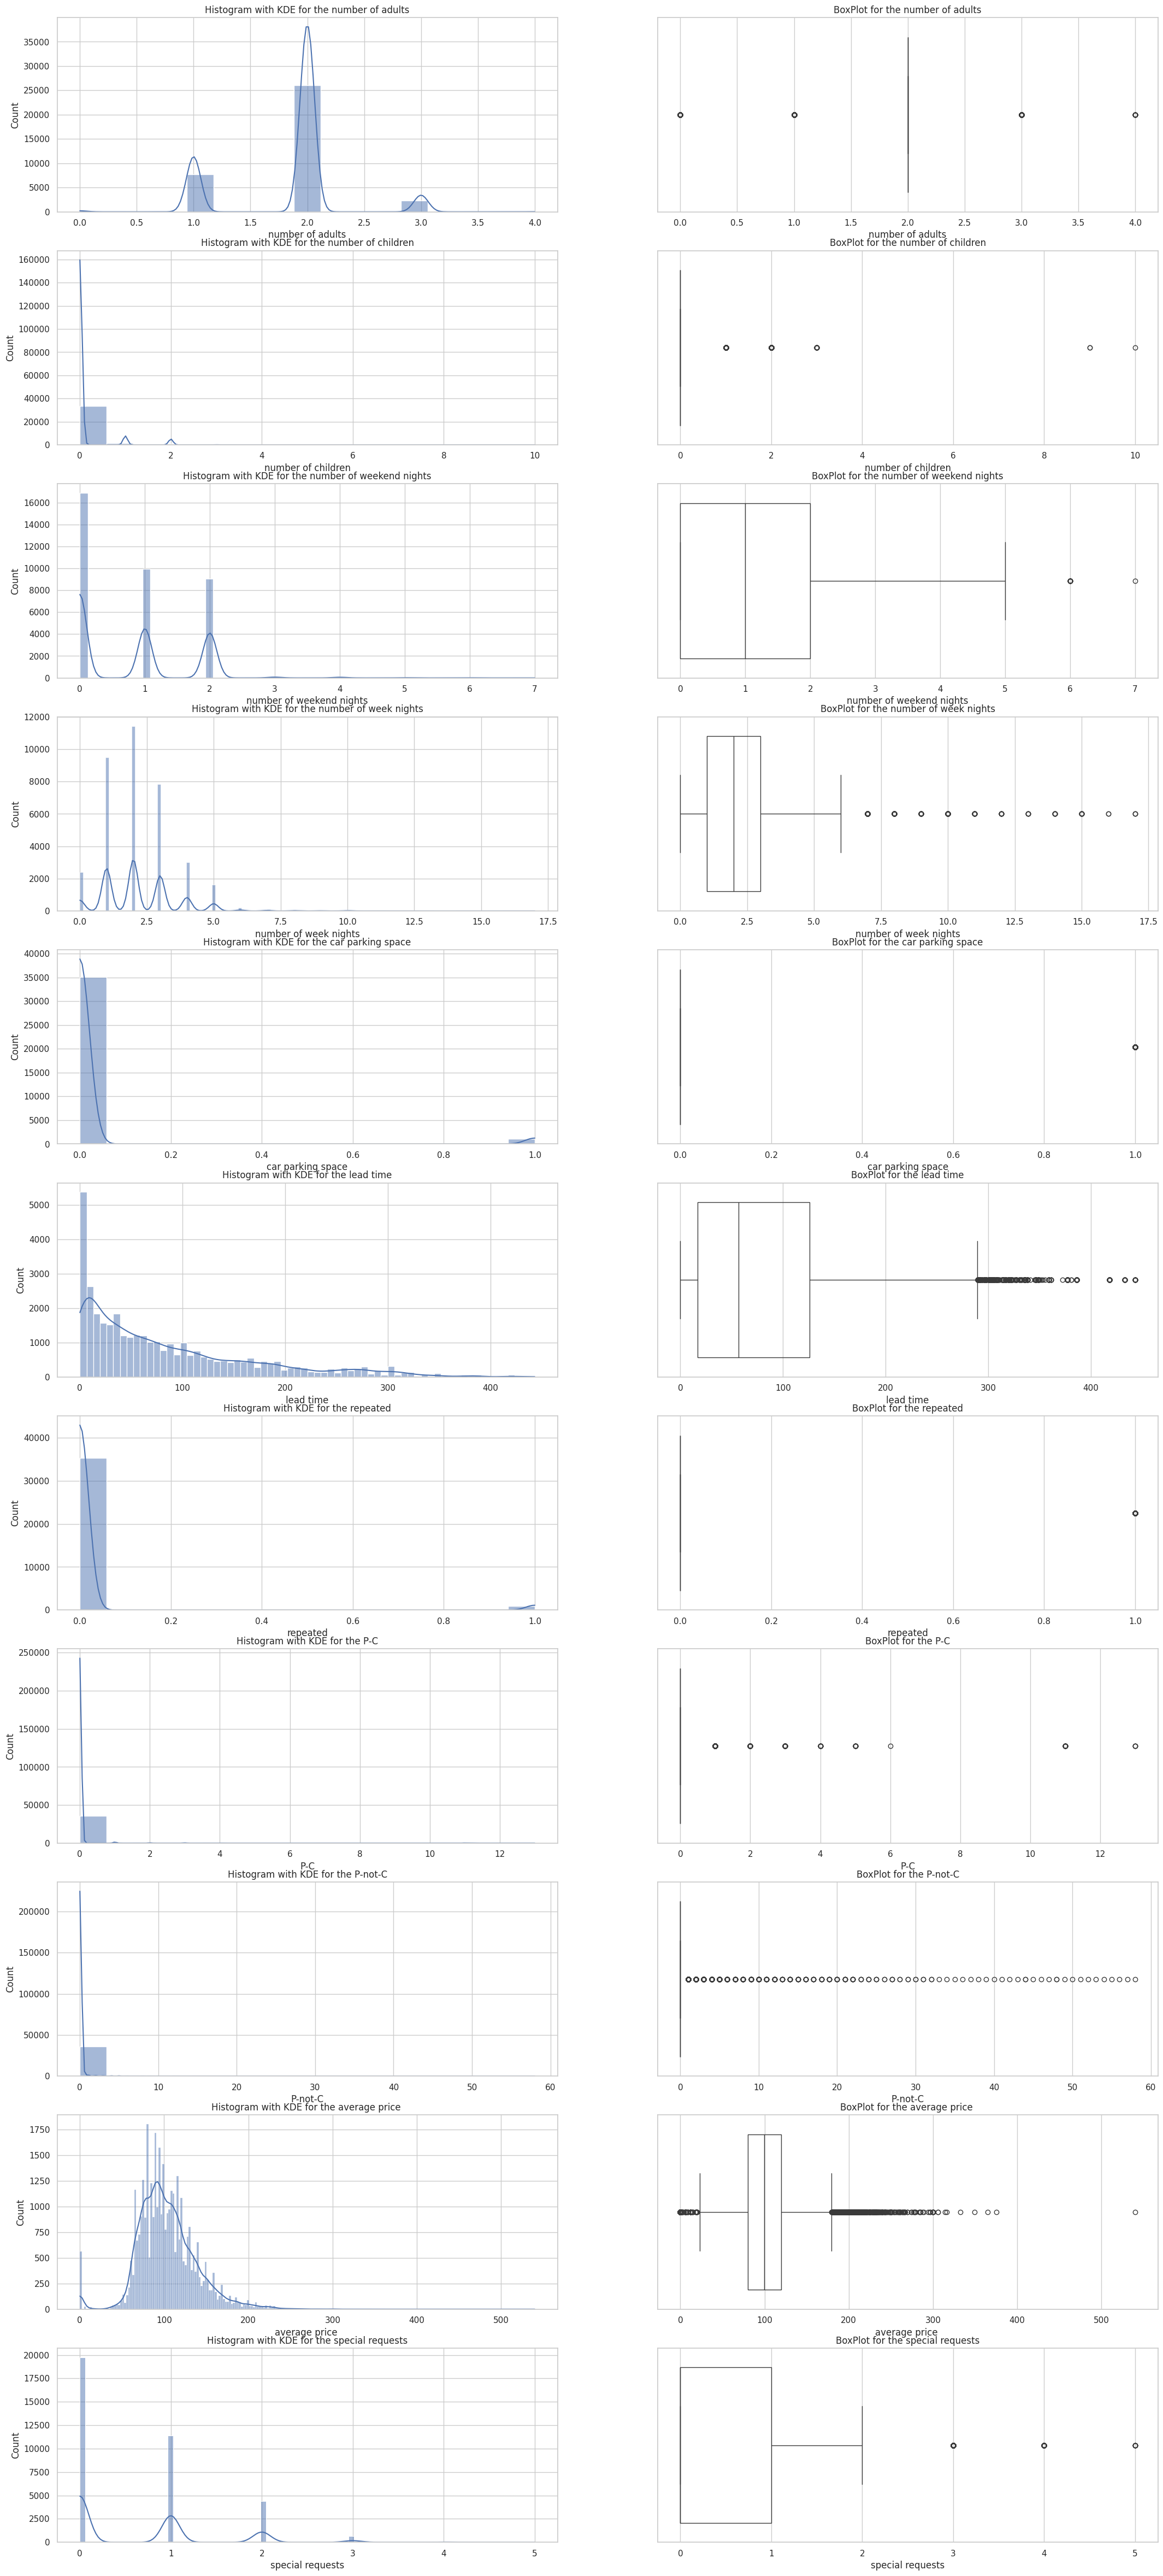

In [ ]:
fig, ax = plt.subplots(11,2,figsize=(26,60))

for i , col in enumerate(num_cols):
    sns.histplot(data=df,x= col, ax=ax[i,0],kde=True,palette=palette)
    ax[i,0].set_title(f"Histogram with KDE for the {col}")

    sns.boxplot(data=df, x= col,ax=ax[i,1] , palette=palette)
    ax[i,1].set_title(f"BoxPlot for the {col}")
plt.show()

* There are some features that can be converted to categorical features to be better in the model stage like number of childrens can be converted that the reservation for a couple or a family and if there is no adults in that row can be replaced with 'other', column like lead time as it has some outlier so we can put some thresholds to enhance this feature to be more insighful, P-C, and P-not-C .


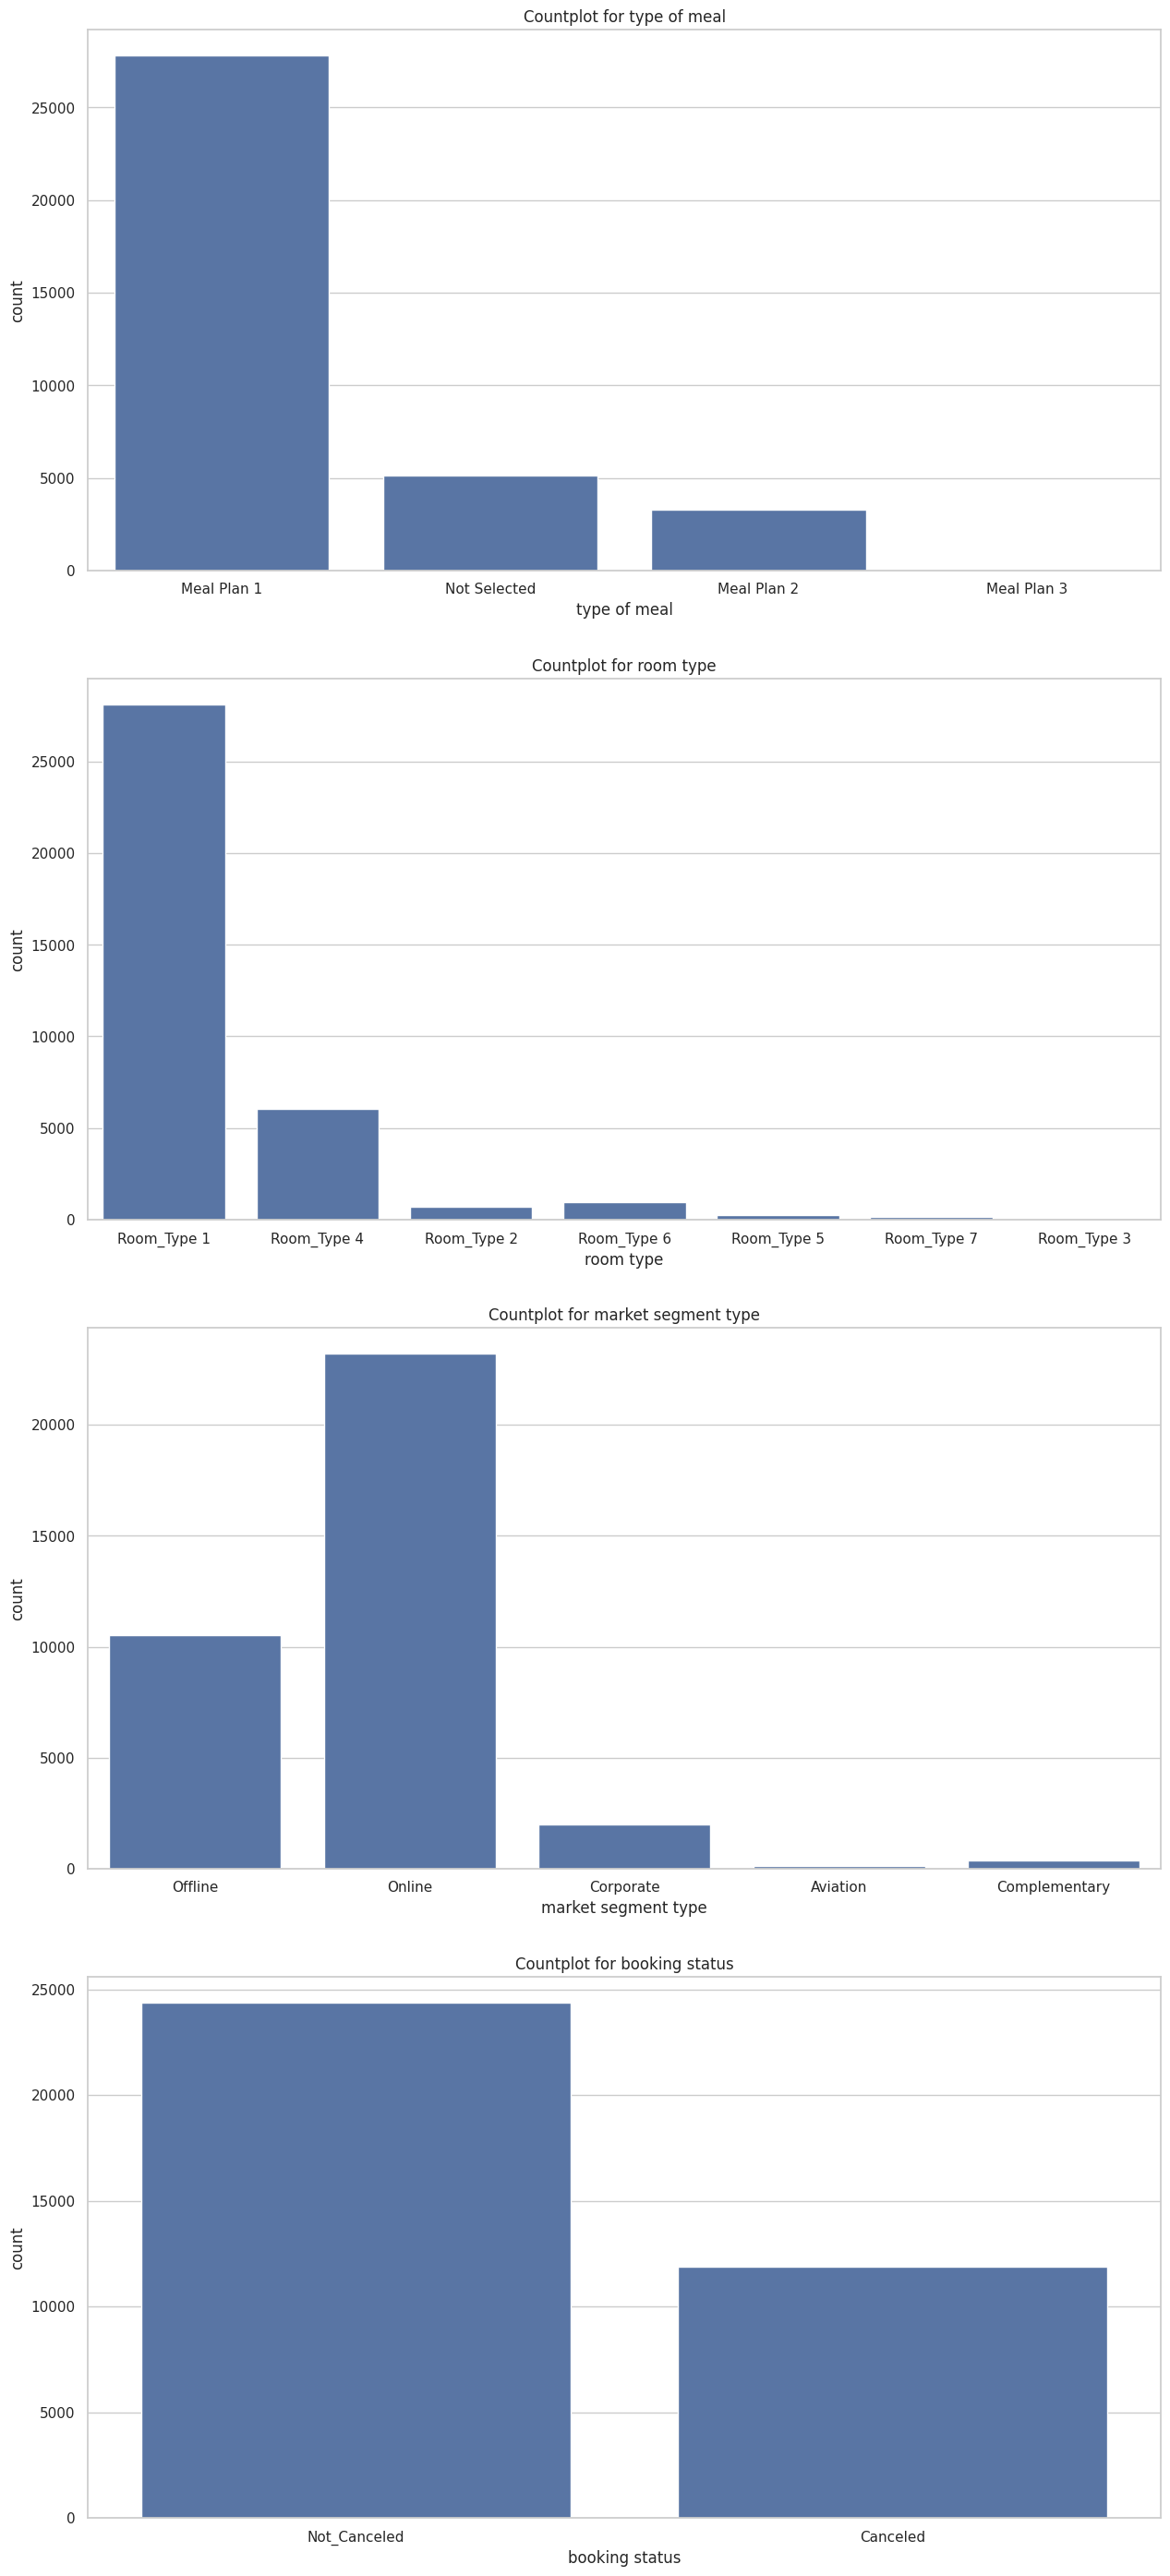

In [ ]:
cat_cols = df.select_dtypes(include=object).columns

fig,ax = plt.subplots(4,1 , figsize=(15,35))

for i , col in enumerate(cat_cols[1:]):

    sns.countplot(data=df, x = col , ax = ax[i])
    ax[i].set_title(f"Countplot for {col}")

plt.show()

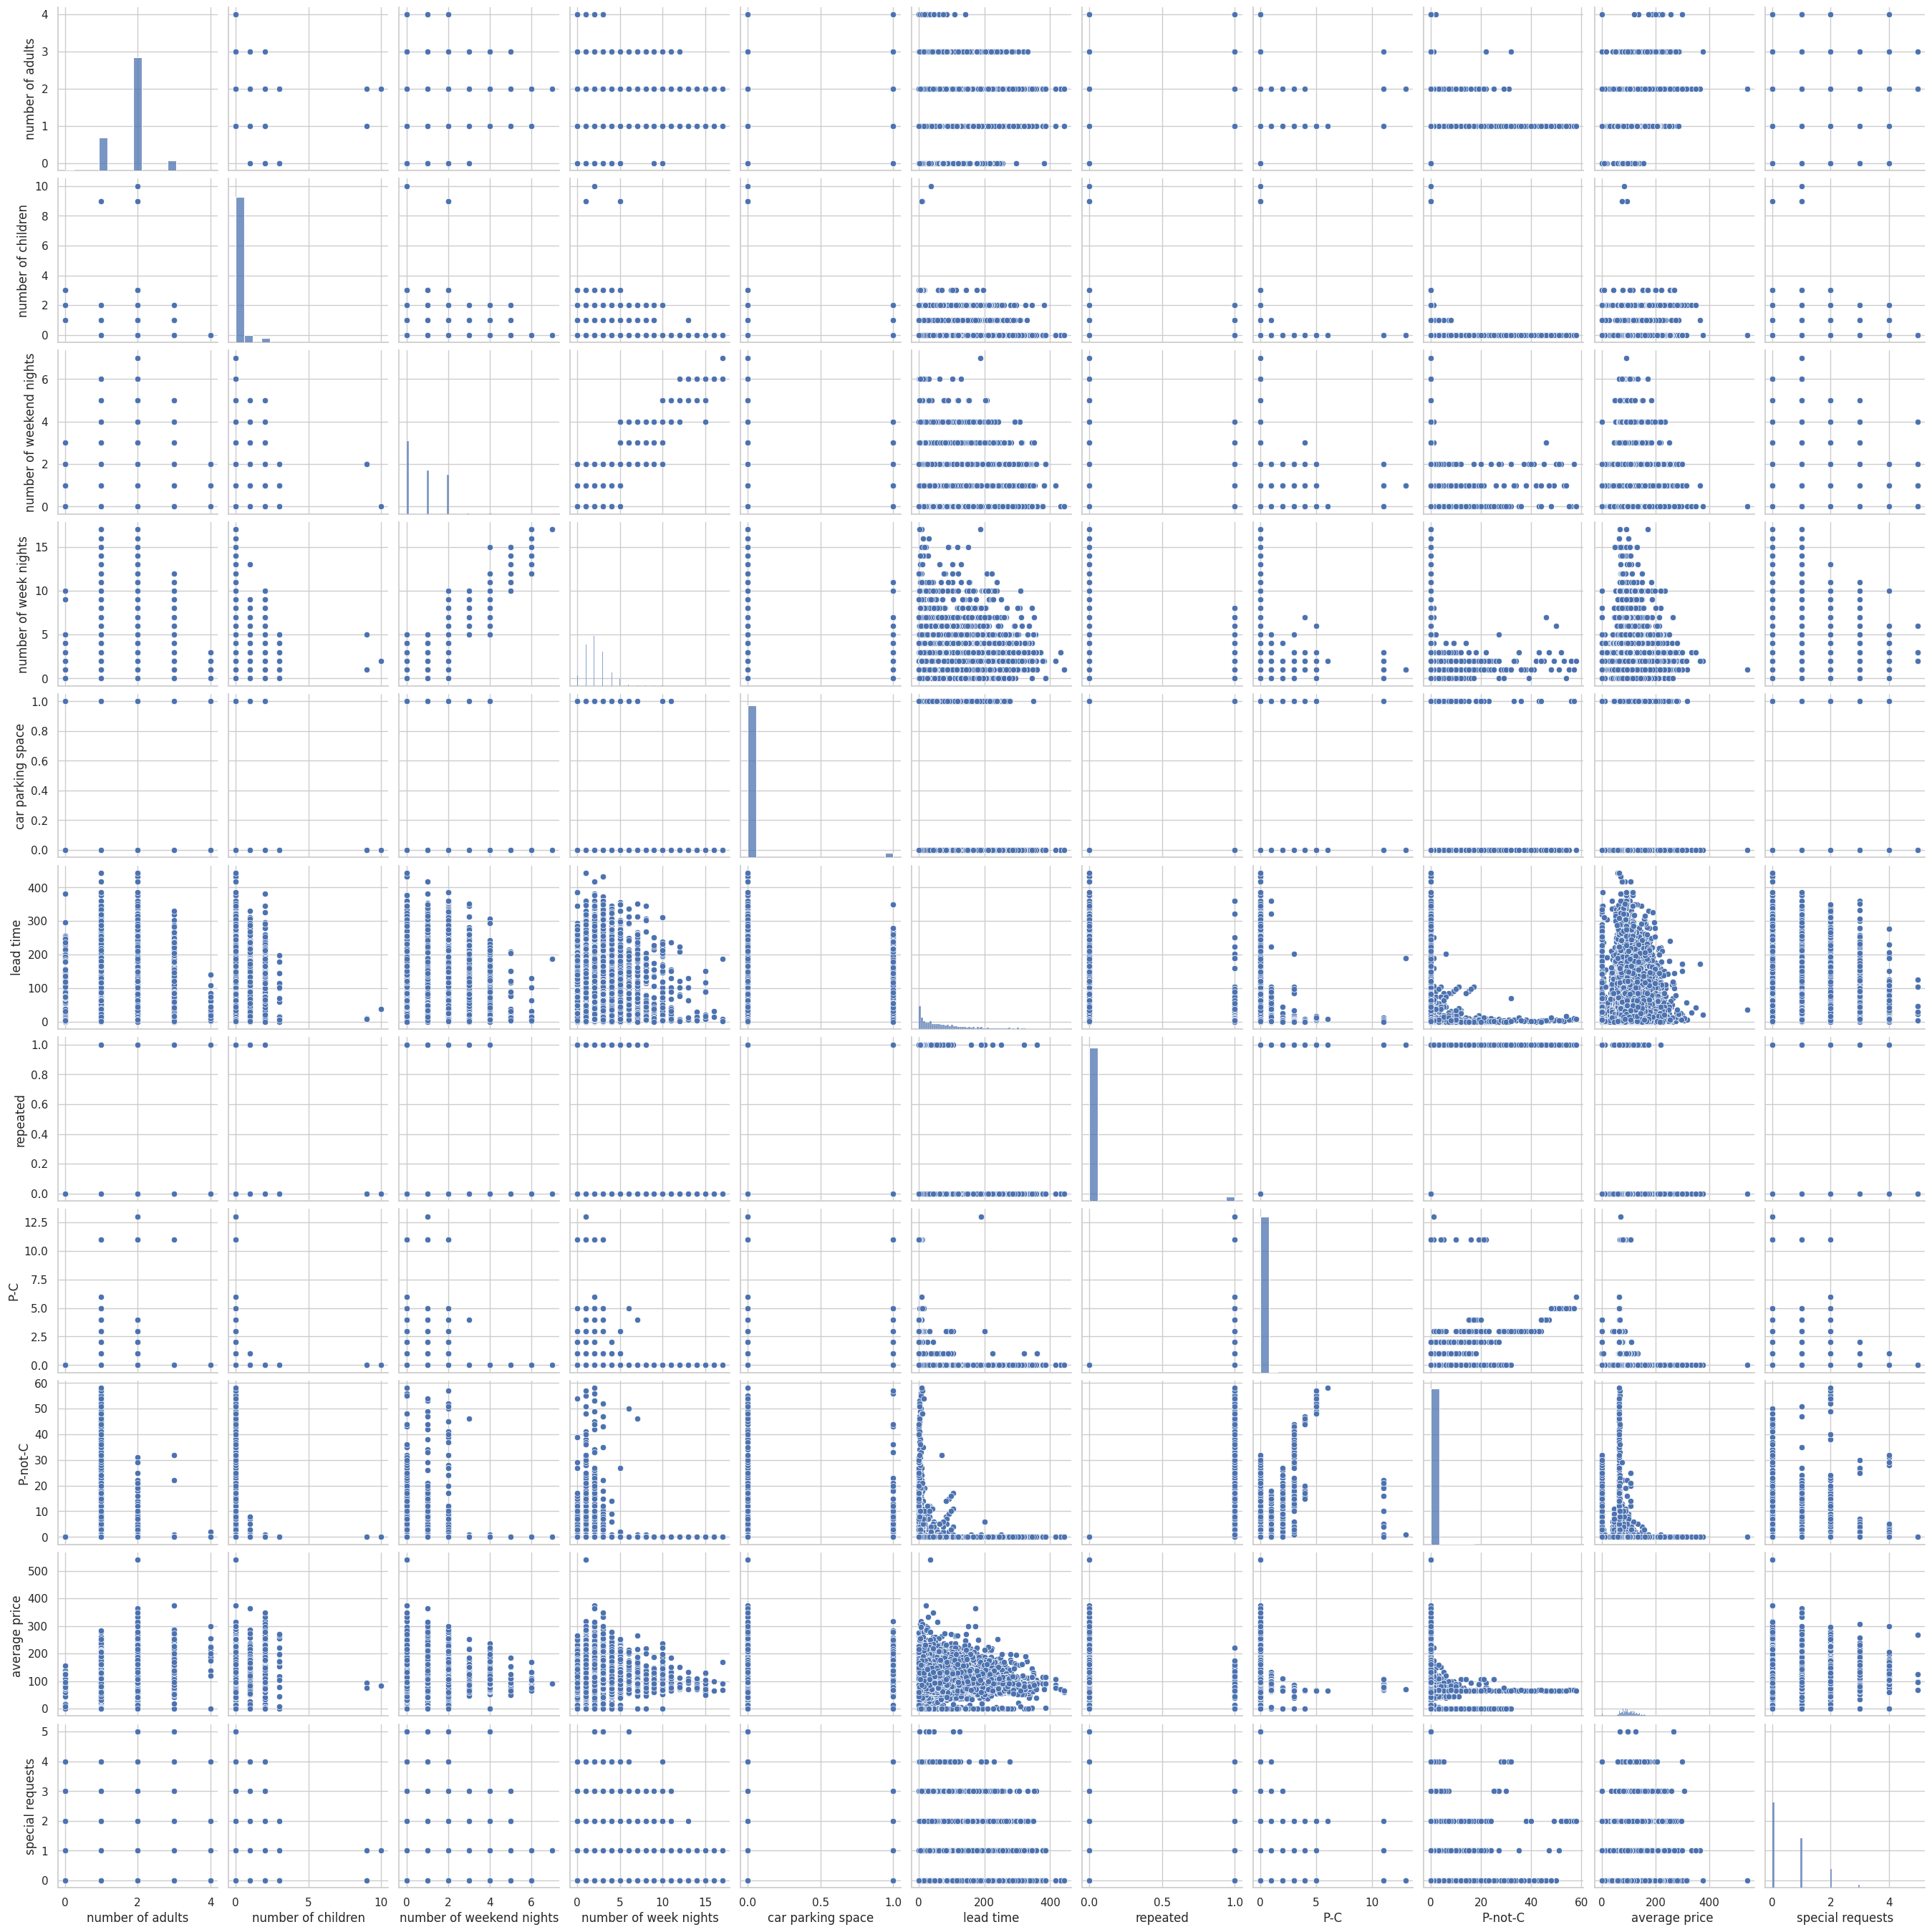

In [ ]:
sns.pairplot(df[num_cols])
plt.show()

* There is no something that is highlighted

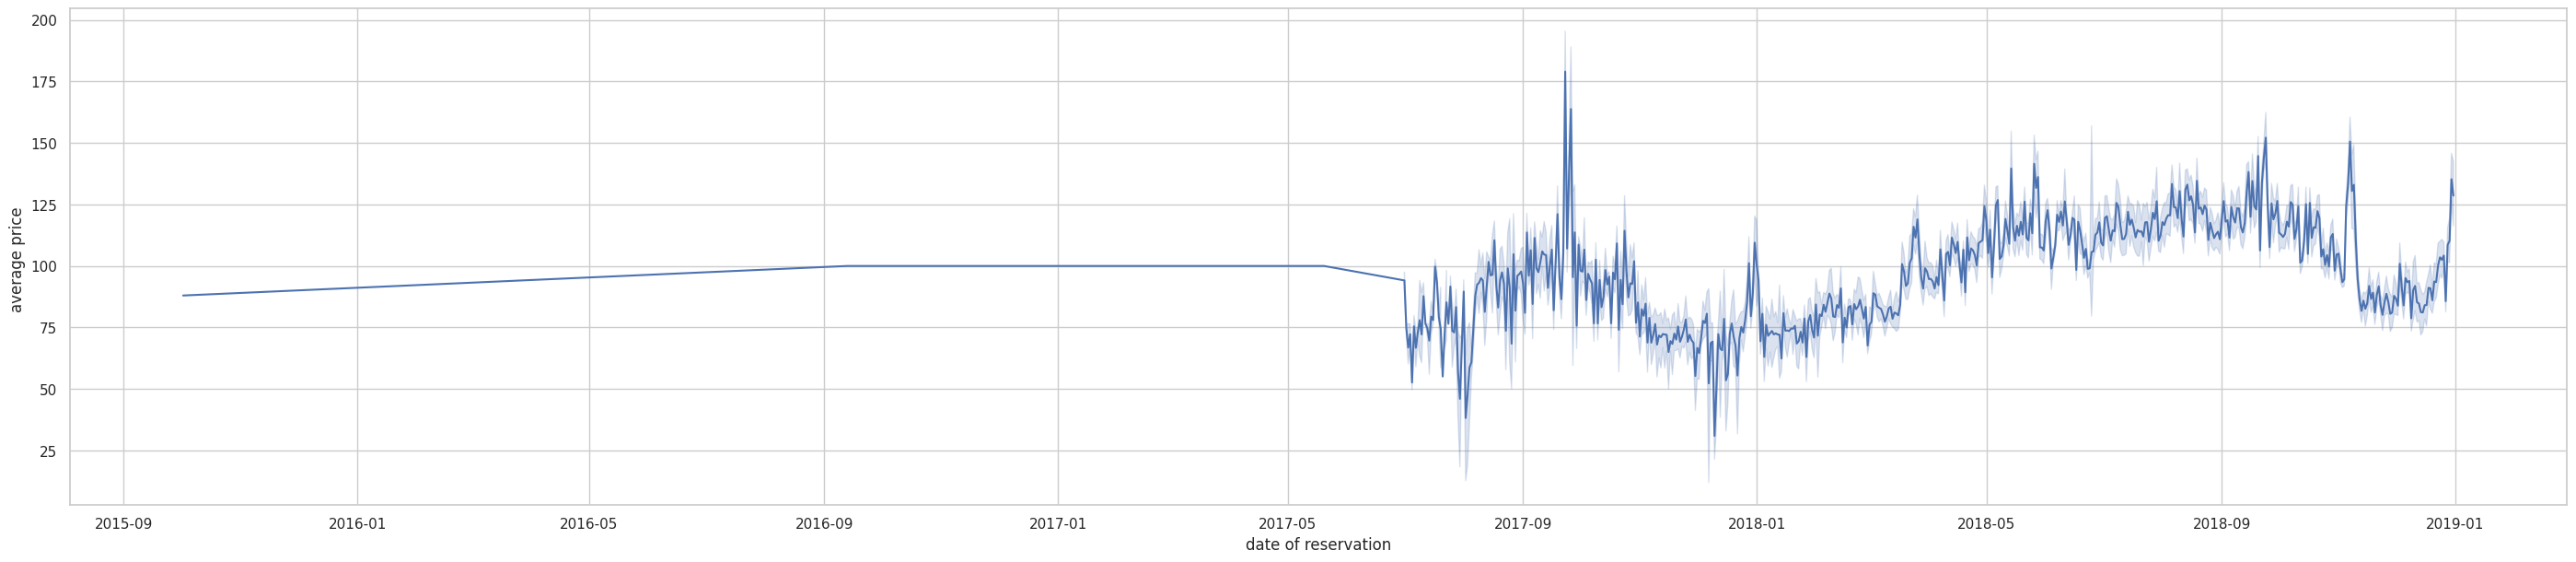

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(35,7))
sns.lineplot(data = df , x = 'date of reservation',y='average price ',ax = ax)
plt.show()

* Lets continue the EDA and more insights on tablau

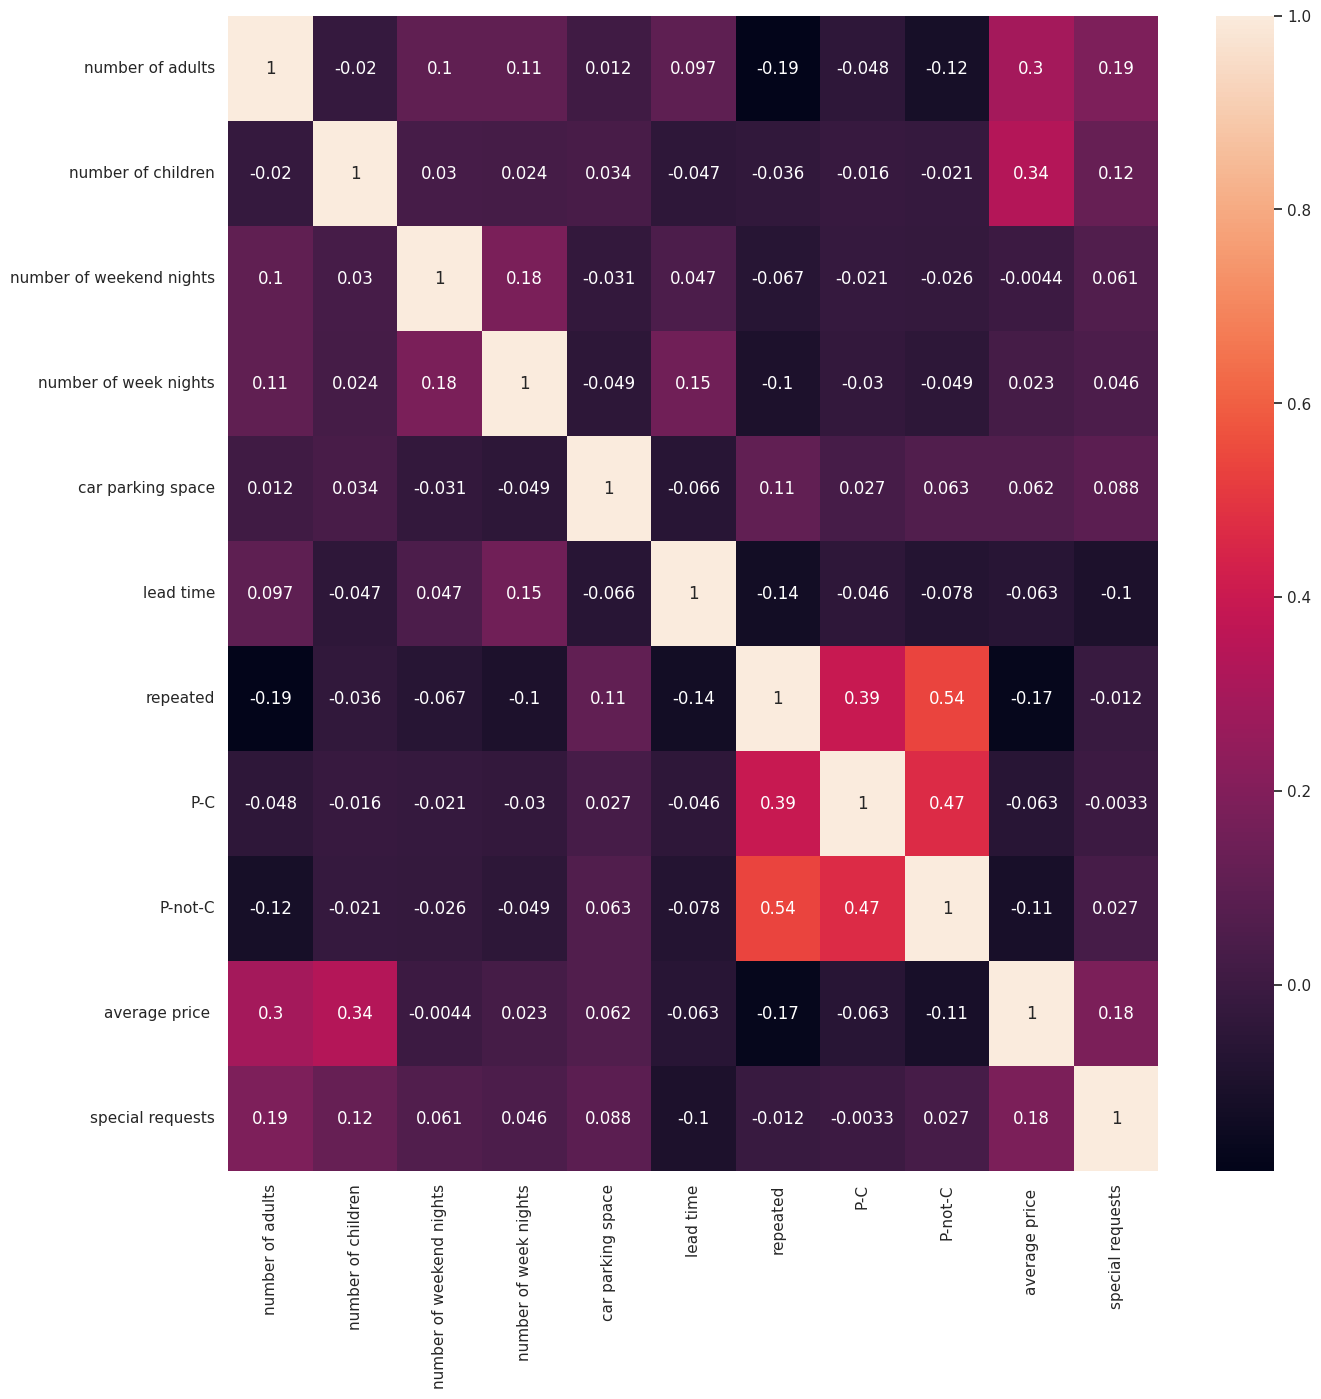

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(15,15))
corr = df[num_cols].corr()
sns.heatmap(corr,annot=True,ax = ax)
plt.show()

# Preprocessing and Cleaning

### Dealing with categorical features

In [ ]:
# Train_test_spliting
from sklearn.model_selection import train_test_split

train_set , test_set = train_test_split(df, test_size= 0.2, random_state=42)

In [ ]:
train_set.shape, test_set.shape

((28998, 17), (7250, 17))

In [ ]:
train_set_copy = train_set.copy()

### feature selection

In [ ]:
train_set_copy.drop(columns=['Booking_ID','date of reservation'],inplace=True)

In [ ]:
cat_features = train_set_copy.select_dtypes(include=object).columns[:-1]

In [ ]:
cat_features

Index(['type of meal', 'room type', 'market segment type'], dtype='object')

In [ ]:
# type of meal
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder(sparse_output=False)
type_of_meal_encoded = one_hot.fit_transform(train_set_copy[cat_features])

In [ ]:
cat_cols_encoded = np.concatenate([one_hot.categories_[0],one_hot.categories_[1],one_hot.categories_[2]])
cat_cols_encoded

array(['Meal Plan 1', 'Meal Plan 2', 'Meal Plan 3', 'Not Selected',
       'Room_Type 1', 'Room_Type 2', 'Room_Type 3', 'Room_Type 4',
       'Room_Type 5', 'Room_Type 6', 'Room_Type 7', 'Aviation',
       'Complementary', 'Corporate', 'Offline', 'Online'], dtype=object)

In [ ]:
df2 = pd.DataFrame(type_of_meal_encoded,columns=cat_cols_encoded)
df2

,Meal Plan 1,Meal Plan 2,Meal Plan 3,Not Selected,Room_Type 1,Room_Type 2,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6,Room_Type 7,Aviation,Complementary,Corporate,Offline,Online
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28993,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28994,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28996,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
train_set_copy.drop(columns=['type of meal','room type','market segment type'],inplace=True)

In [ ]:
train_set_copy.reset_index(drop=True,inplace=True)
train_set_copy

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,booking status
0,2,0,2,2,0,50,0,0,0,63.75,0,Canceled
1,1,0,0,1,0,8,1,1,17,65.00,1,Not_Canceled
2,3,0,1,3,0,148,0,0,0,136.43,1,Canceled
3,1,0,1,4,0,4,0,0,0,86.00,1,Not_Canceled
4,0,2,2,4,0,23,0,0,0,128.49,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...
28993,2,0,0,2,0,39,0,0,0,109.00,0,Not_Canceled
28994,1,0,0,2,0,4,0,0,0,121.00,0,Not_Canceled
28995,3,0,0,2,0,52,0,0,0,137.70,1,Not_Canceled
28996,2,0,0,3,0,213,0,0,0,130.00,0,Canceled


In [ ]:
train_set_copy_encoded = pd.concat([train_set_copy,df2],axis=1)

In [ ]:
train_set_copy_encoded.shape

(28998, 28)

### Numrical features

In [ ]:
X_train = train_set_copy_encoded.drop(columns=['booking status'])
y_train = train_set_copy_encoded['booking status']

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
train_set_copy_ready =  ss.fit_transform(X_train)

### Target Column

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)


### Class to remove date and id columns

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
class ColumnRemover(BaseEstimator,TransformerMixin):
    def __init__(self,columns = None):

        self.columns =columns

    def fit(self,X,y=None):
        return self
    def transform(self,X):
        X_transformed = X.drop(columns= self.columns ,errors = 'ignore')

        return X_transformed


In [ ]:
# Class to convert the LeadTime feature into category

class convert_lead_time(BaseEstimator,TransformerMixin):
    def __init__(self,columns= None):
        self.columns = columns

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        X_copy = X.copy()
        for col in self.columns:
            X_copy[col] = pd.cut(X_copy[col],
                                 bins=[0, 30, 60, X_copy[col].max()],
                                 labels=[0, 1, 2],
                                 include_lowest=True)
        return X_copy[self.columns]

### Pipelines

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

columns_to_be_removed = ['Booking_ID','date of reservation']

columns_to_be_converted =['lead time']
cat_pipeline = make_pipeline(
    (SimpleImputer(strategy='most_frequent')),
    (OneHotEncoder(sparse_output=False)),
    (StandardScaler())
)
num_pipeline = make_pipeline(
    (SimpleImputer(strategy='median')),
    (StandardScaler())
)
columnremover = ColumnRemover(columns=columns_to_be_removed)

convert_lead = convert_lead_time(columns=columns_to_be_converted)

Pipeline = ColumnTransformer([
    ('remover',columnremover,columns_to_be_removed),
    ('convert',convert_lead,columns_to_be_converted),
    ('cat',cat_pipeline,cat_features),
    ('num',num_pipeline,num_cols)
])


# Imbalancing Issue

In [ ]:
# second approach handling imbalancing (under sampling)

# class counts
# class_count_Not_canceled , class_count_canceled=train_set['booking status'].value_counts()


# # seperate class

# class_not = train_set[train_set['booking status']== 'Not_Canceled']
# class_canceled = train_set[train_set['booking status']== 'Canceled']

# print(f'Class Not canceled: {class_not.shape}')
# print(f'Class canceled: {class_canceled.shape}')

# class_not_canceled = class_not.sample(class_count_canceled)

# train_set_sampled = pd.concat([class_not_canceled,class_canceled],axis=0)
# print(f"Total classed of Not and the canceled:{train_set_sampled['booking status'].value_counts()}")

In [ ]:
X_train_set = train_set.drop(columns=['booking status'])
y_train_set = train_set['booking status']


In [ ]:
# OverSampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_train_set_sampled , y_train_set_sampled = ros.fit_resample(X_train_set,y_train_set)


In [ ]:
X_train_ready = Pipeline.fit_transform(X_train_set_sampled)
y_train = le.fit_transform(y_train_set_sampled)

# Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_predict
# metrics
from sklearn.metrics import accuracy_score, f1_score , precision_score,recall_score
import time

In [ ]:
model_name = []
accuracy = []
f1 = []
precision = []
recall = []
training_time = []

models = [
    LogisticRegression(random_state=42),
    SVC(random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    DummyClassifier(random_state=42)
]


for model in models:

    start_time = time.time()
    predictions = cross_val_predict(model,X_train_ready,y_train,cv=3)
    end_time = time.time()

    model_name.append(model.__class__.__name__)
    accuracy.append(str(accuracy_score(y_train,predictions)))
    f1.append(str(f1_score(y_train,predictions)))
    precision.append(str(precision_score(y_train,predictions)))
    recall.append(str(recall_score(y_train,predictions)))
    training_time.append(str(end_time-start_time))

In [ ]:
models_df = pd.DataFrame({"model_name":model_name,'accuracy':accuracy,'f1':f1,'precision':precision,'recall':recall,'training_time':training_time})

models_df = models_df.set_index('model_name')
models_df.sort_values(by='f1',ascending=False)

,accuracy,f1,precision,recall,training_time
model_name,,,,,
RandomForestClassifier,0.9265332306902746,0.9245725426140106,0.9499242096145517,0.9005388760585066,8.563126802444458
DecisionTreeClassifier,0.9066204772902232,0.9022010803837781,0.9470209884901828,0.8614318706697459,0.34145545959472656
SVC,0.8031819348216577,0.8030606480768243,0.8035558296079338,0.8025660764690787,122.93411874771118
LogisticRegression,0.776058506543495,0.7778088957914301,0.7717764753435732,0.7839363613035668,0.4508993625640869
DummyClassifier,0.5,0.0,0.0,0.0,0.031305551528930664


# Ensemble Models

In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier


In [ ]:
model_name = []
accuracy = []
f1 = []
precision = []
recall = []
training_time = []

models = [
    XGBClassifier(n_estimators=100, random_state=42),
    LGBMClassifier(n_estimators=100, random_state=42),
    CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0),
    GradientBoostingClassifier(n_estimators=100, random_state=42),
     AdaBoostClassifier(n_estimators=100, random_state=42)
]


for model in models:

    start_time = time.time()
    predictions = cross_val_predict(model,X_train_ready,y_train,cv=3)
    end_time = time.time()

    model_name.append(model.__class__.__name__)
    accuracy.append(str(accuracy_score(y_train,predictions)))
    f1.append(str(f1_score(y_train,predictions)))
    precision.append(str(precision_score(y_train,predictions)))
    recall.append(str(recall_score(y_train,predictions)))
    training_time.append(str(end_time-start_time))

[LightGBM] [Info] Number of positive: 12990, number of negative: 12990
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 641
[LightGBM] [Info] Number of data points in the train set: 25980, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 12990, number of negative: 12990
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 642
[LightGBM] [Info] Number of data points in the train set: 25980, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000

In [ ]:
models_df = pd.DataFrame({"model_name":model_name,'accuracy':accuracy,'f1':f1,'precision':precision,'recall':recall,'training_time':training_time})

models_df = models_df.set_index('model_name')
models_df.sort_values(by='f1',ascending=False)

,accuracy,f1,precision,recall,training_time
model_name,,,,,
XGBClassifier,0.8781370284834488,0.8793966020773548,0.870400160868691,0.8885809597125994,10.294646978378296
LGBMClassifier,0.8628432127277393,0.8666051061918191,0.8434706568208317,0.8910443931229151,4.7486326694488525
CatBoostClassifier,0.8395945599178856,0.8432822724195853,0.8243309479462798,0.863125481139338,11.966904163360596
GradientBoostingClassifier,0.822376186810367,0.826001709315771,0.809479233384244,0.8432127277392867,11.762160062789917
AdaBoostClassifier,0.7933025404157044,0.7948554692474213,0.788928210313448,0.8008724659994868,6.598226547241211


# RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
X_test_set = test_set.drop(columns=['booking status'])
y_test_set = test_set['booking status']

X_test_ready = Pipeline.transform(X_test_set)
y_test = le.transform(y_test_set)

In [ ]:
rf_model = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [10, 20, 30],  # Depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 4],  # Minimum samples at leaf

}


grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')


grid_search.fit(X_train_ready, y_train)


best_params = grid_search.best_params_
best_score = grid_search.best_score_


best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test_ready)
test_accuracy = accuracy_score(y_test, y_pred)


print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score: 0.9274
Test Accuracy: 0.8764


In [ ]:
accuracy = []
f1 = []
precision = []
recall = []


predictions = best_rf_model.predict(X_test_ready)


accuracy.append(str(accuracy_score(y_test,predictions)))
f1.append(str(f1_score(y_test,predictions)))
precision.append(str(precision_score(y_test,predictions)))
recall.append(str(recall_score(y_test,predictions)))


models_df = pd.DataFrame({"model_name":"RandomForestClassifier",'accuracy':accuracy,'f1':f1,'precision':precision,'recall':recall})
models_df = models_df.set_index('model_name')
models_df.sort_values(by='f1',ascending=False)

,accuracy,f1,precision,recall
model_name,,,,
RandomForestClassifier,0.8764137931034482,0.9079515101705362,0.9105707809602308,0.9053472649047326
